In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

## Problem 1a
When given a data matrix, an easy way to tell if any two columns are correlated is tolook at a scatter plot of each column against each other column.  For a warm up, do this:
Look at the data in DF1 in Lab2Data.zip.  Which columns are (pairwise) correlated? 


Figure out how to do this with Pandas, and also how to do this with Seaborn.

In [5]:
data_file1 = "./DF1"
data_file2 = "./DF2"

,0,1,2,3,4
0,4999.5,0.000000,1.000000,2.000000,3.000000
1,0.0,1.038502,0.899865,0.835053,-0.971528
2,1.0,0.320455,-0.647459,0.149079,0.352593
3,2.0,0.055480,2.234771,0.271672,-2.108739
4,3.0,-0.007260,-0.524299,-0.126550,0.670827
...,...,...,...,...,...
9996,9995.0,-0.632309,-0.145873,-0.797517,0.436184
9997,9996.0,0.679417,-0.530216,0.526470,0.439397
9998,9997.0,0.890697,-2.210855,1.072751,2.285372
9999,9998.0,0.475293,0.490971,0.536909,-0.195772


Correlation Matrix:


,0,1,2,3,4
0,1.000000,-0.003991,0.008788,-0.004043,-0.007083
1,-0.003991,1.000000,-0.003998,0.989869,0.004107
2,0.008788,-0.003998,1.000000,-0.003887,-0.989445
3,-0.004043,0.989869,-0.003887,1.000000,0.004662
4,-0.007083,0.004107,-0.989445,0.004662,1.000000


Pandas pairplot (scatter matrix):


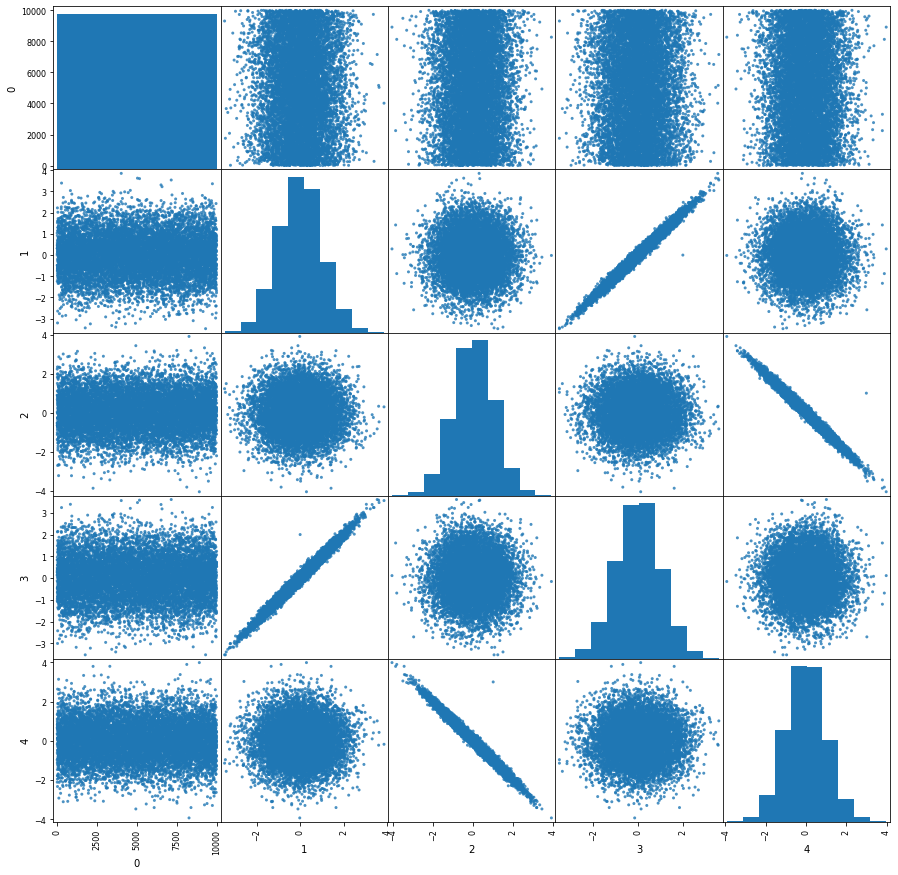

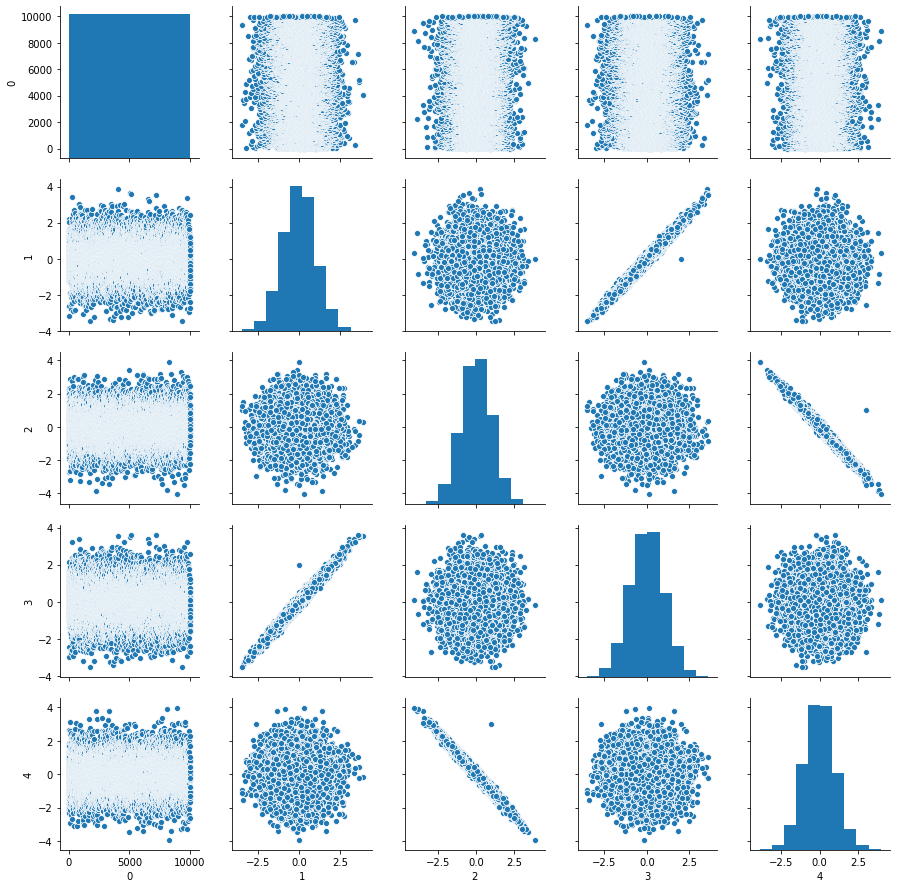

In [23]:
df1 = pd.read_csv(data_file1, header=None)
df1_mean = df1.mean()
df1.fillna(df1_mean, inplace=True)

display(df1)
print("Correlation Matrix:")
display(df1.corr())

print("Pandas pairplot (scatter matrix):")
pd_pairplot = pd.plotting.scatter_matrix(df1,figsize=(15, 15), alpha=.8)

sns_pairplot = sns.pairplot(df1)
#sns_pairplot.fig.suptitle("Seaborn pairplot:") # title doesn't appear how I want it to..

From the graphs above, it appears that the graphs 1 and 3 are correlated (45 degree line)

And graphs 2 and 4 are correlated (-45 degree line)

## Problem 1b

Compute the covariance matrix of the data.  Write the explicit expression for what this is,  and  then  use  any  command  you  like  (e.g.,  np.cov)  to  compute  the  4×4  matrix.

Explain why the numbers that you get fit with the plots you got.

\begin{equation*}
Covariance(X, Y) = \sum _ { i = 1 } ^ { n } \frac {(x_i - \bar x)(y_i - \bar y)} {N}
\end{equation*}

\begin{equation*}
C_{i,j} = \sigma (x_i, x_j)
\end{equation*}

The covariance matrix corresponds to the covariance between variables for every element (i,j).


Two elements are strongly related if their covariance is close to 1.

As you can see below, element (1,3) (and thus also (3,1)) is 0.991523 ~ 1, corresponding to the positive 45 degree angle, showing their strong relationship.

Likewise, (2,4) (and thus also (4,2)) shows -0.995059 ~ -1, corresponding to the negative 45 degree angle, showing their strong relationship. 

In [27]:
df1.cov()

,0,1,2,3,4
0,8.333333e+06,-11.529682,25.437628,-11.681482,-20.508118
1,-1.152968e+01,1.001458,-0.004012,0.991523,0.004122
2,2.543763e+01,-0.004012,1.005376,-0.003901,-0.995059
3,-1.168148e+01,0.991523,-0.003901,1.001885,0.004680
4,-2.050812e+01,0.004122,-0.995059,0.004680,1.005973


## Problem 1c

The  above  problem  in  reverse.   Generate  a  zero-mean  multivariate  Gaussian  random variable in 3 dimensions,
Z = (X1,X2,X3) so that (X1,X2) and (X1,X3) are uncorrelated, but (X2,X3) are correlated.  

Specifically:  choose a covariance matrix that has the above correlations structure, and write this down.  Then find a way to generate samples from  this  Gaussian.   Choose  one  of  the  non-zero  covariance  terms  (Cij,  if C denotes your covariance matrix) and plot it vs the estimated covariance term, as the number ofsamples you use scales.  The goal is to get a visual representation of how the empirical covariance converges to the true (or family) covariance.

Text(0.5, 0, 'samples')

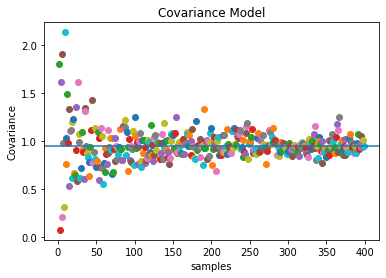

In [57]:
import warnings
warnings.filterwarnings("ignore")

covariance_structure = lambda mean,cov,samples,i,j: np.cov(np.random.multivariate_normal(mean,cov,samples).T)[i][j]

mean = [0,0,0]
cov = [[1, 0, 0], [0,1,0.95], [0,0.95, 1]] # correlation between X2 and X3 is defined

fig, ax = plt.subplots(1,1)
for n in range(0,400):
    ignore = ax.plot(n, covariance_structure(mean, cov, n, 1, 2), marker='o')


ax.set_title("Covariance Model")
ax.axhline(0.95) # Set covariacnce - convergence point
ax.set_ylabel("Covariance")
ax.set_xlabel("samples")
    

## Problem 2

Consider the two-dimensional data in DF2 in Lab2Data.zip.  Look at a scatterplot of the data.  It contains two points that look like potential outliers.  Which one is “more” outlying?  Propose a transformation of the data that makes it clear that the point at (−1,1) is  more  outlying  than  the  point  at  (5.5,5),  even  though  the  latter  point  is “farther  away” from the nearest points.  Plot the data again after performing this transformation.  Provide discussion as appropriate to justify your choice of transformation.

In [59]:
df2 = pd.read_csv(data_file2, header=None)

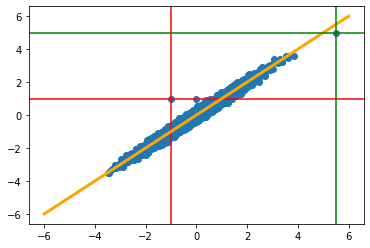

In [78]:
plt.scatter(df2[1], df2[2])
plt.axvline(-1, color='r')
plt.axhline(1, color='r')
plot = plt.plot([-6,6],[-6,6], color='orange', linewidth=3)
plt.axvline(5.5, color='g')
plt.axhline(5, color='g')

As you can see from the graph above, the point (-1,1) seems to be further away from the projection line. How can we tell for sure? 

Let's plot a residual graph and witness the difference from the 45 degree line

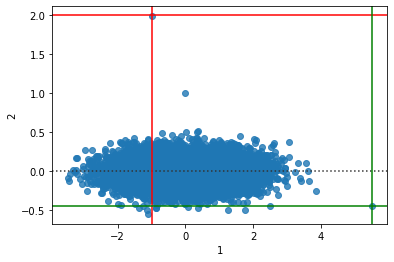

In [84]:
plot = sns.residplot(df2[1], df2[2])

## the plot point (-1,1)
plt.axvline(-1, color='r')
plt.axhline(2, color='r')

## the plot point (5.5, 5)
plt.axvline(5.5, color='g')
plt.axhline(-.45, color='g')

As you can seefrom the plot above, the point (-1,1) corresponds to the residual point (-1, 2) - meaning that the diference between our prediction and the data is 2. Meanwhile, (5.5, 5) corresponds to the residual point (5.5, -.45) - meaning that the difference between our prediction and the data is 0.45

because 2 > 0.45, we know that the point (-1,1) is the greater outlier

## Problem 3a
Generate
n= 150 data points as follows: 

xi∼N(0,1)

ei∼N(0,1)

yi=β∗0+xiβ∗1+ei, where β0=−3 and β∗1= 0.  Note that since β∗1= 0,this means that yand x are unrelated!

Use either the closed form expression for β1(hat) or a linear regression package of your choice, to obtain the least-squares estimate for β1 (hat).  Is it equal to β∗1?  Either way, explain.

In [127]:
mean = 0
std = 1
n= 150
x_i = np.random.normal(mean, std, n)

e_i = np.random.normal(mean, std, n)

beta_0 = -3
beta_1 = 0

y_i = beta_0 + beta_1*x_i + e_i 
x_i = x_i[:, None]
reg = linear_model.LinearRegression().fit(x_i, y_i)
print(reg.coef_)
print(reg.intercept_)
print("The regression is not able to find a 0 slope, but the value appears to be very close to 0")

[0.03851592]
-3.0244479294235913
The regression is not able to find a 0 slope, but the value appears to be very close to 0


## Problem 3b
Now do the following M= 99 more times.  Create fresh data exactly as you did above, but for the same β∗0 and β∗1. This is like going out and collecting more data from the same source.  (For example,  like I’m collecting statistics on sleep vs test grades for EE460J students, and I repeat the experiment each semester, each semester getting fresh data,i.e., new students).  Once you are done with this, you will therefore have 100 different calculated values for β1(hat).  Plot these in a histogram of sufficiently small bins to make it look nice.•

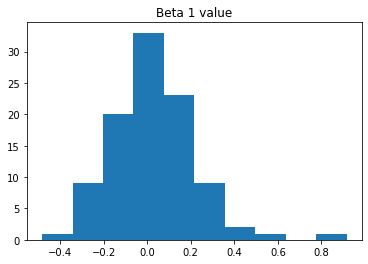

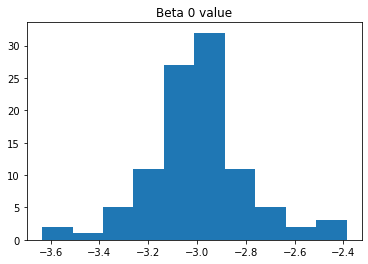

In [158]:
mean = 0
std = 1
n= 150

beta_0 = -3
beta_1 = 0

reg_coefficients = []
reg_intercepts = []
for i in range(1, 100):
    x_i = np.random.normal(mean, std, i)
    e_i = np.random.normal(mean, std, i)
    
    y_i = beta_0 + beta_1*x_i + e_i 
    x_i = x_i[:, None]
    reg_coefficients.append((linear_model.LinearRegression().fit(x_i, y_i)).coef_)
    reg_intercepts.append((linear_model.LinearRegression().fit(x_i, y_i)).intercept_)
    
reg_coefficients = [i[0] for i in reg_coefficients]
plot1 = plt.hist(reg_coefficients, bins=10)
plt.title("Beta 1 value")
plt.show()
plot2 = plt.hist(reg_intercepts, bins=10)
plt.title("Beta 0 value")
plt.show()

## Problem 3c
Compute the standard deviation of the above 100 points.

In [159]:
np_coeff = np.array(reg_coefficients)
np_int = np.array(reg_intercepts)

print("B1 std deviation:" + str(np_coeff.std()))
print("B0 std deviation: " + str(np_int.std()))

B1 std deviation:0.19694195048760887
B0 std deviation: 0.20407852509955823


## Problem 3d
Now repeat the experiment for a larger n, say n= 600.  That is, each batch of data you use to compute β1(hat),  will now have more data.  Even before you started this class,  you all knew that more data means more accurate.  So we expect that the values of β1(hat) we compute, should be better estimates of β∗1.  What exactly does “more accurate” mean? Now we are finding this out:  it means less variance.  You now have M= 100 values of β1(hat).  Again, plot these, and compute the standard deviation.  The 1/√n law tells us that we should expect the standard deviation to be about half of what it was before, since you now used 4× the data.

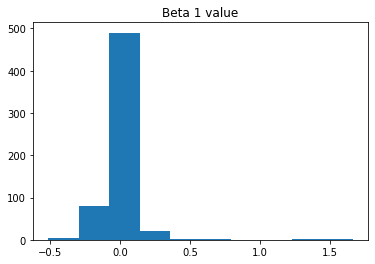

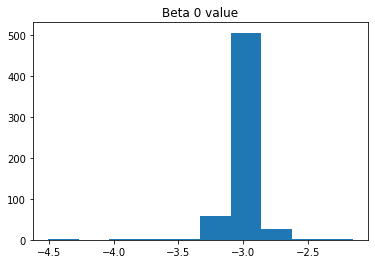

B1 std deviation:0.1307916924854775
B0 std deviation: 0.12708097843105054


In [160]:
reg_coefficients = []
reg_intercepts = []
for i in range(1, 600):
    x_i = np.random.normal(mean, std, i)
    e_i = np.random.normal(mean, std, i)
    
    y_i = beta_0 + beta_1*x_i + e_i 
    x_i = x_i[:, None]
    reg_coefficients.append((linear_model.LinearRegression().fit(x_i, y_i)).coef_)
    reg_intercepts.append((linear_model.LinearRegression().fit(x_i, y_i)).intercept_)
    
reg_coefficients = [i[0] for i in reg_coefficients]
plot1 = plt.hist(reg_coefficients, bins=10)
plt.title("Beta 1 value")
plt.show()
plot2 = plt.hist(reg_intercepts, bins=10)

plt.title("Beta 0 value")
plt.show()

np_coeff = np.array(reg_coefficients)
np_int = np.array(reg_intercepts)

print("B1 std deviation:" + str(np_coeff.std()))
print("B0 std deviation: " + str(np_int.std()))

## Problem 3e
Finally, we will repeat this several more times, to try to empirically observe this 1/√n law.  Thus:  repeat the above experiment for different values of n.  Plot these values, and on the same plot, try to fit c/√n for some constant c.  You can choose which and how many values of n you choose.  Think of yourselves as empirical statisticians, trying to learn some hidden law.  So choose enough values of n so that you can “see” the right answer (which we know should scale like 1/√n).

It looks as though the samples are reflected across ~0.5 from 1/sqrt(n)
From the second plot shown, it appears that maybe we can reflect 1/sqrt(n) and add 1 to fit the graph


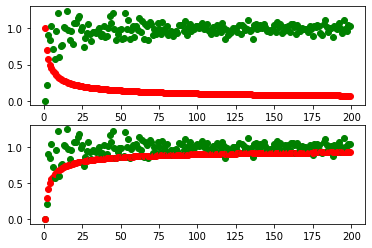

In [178]:
fig, ax = plt.subplots(2,1)

for i in range(1, 200):
    x_i = np.random.normal(mean, std, i)
    e_i = np.random.normal(mean, std, i)
    
    y_i = beta_0 + beta_1*x_i + e_i 
    x_i = x_i[:, None]
    
   # sample = (linear_model.LinearRegression().fit(x_i, y_i))
    #sample_raw = [s[0] for s in sample]
    ax[0].plot(i, y_i.std(), marker='o', color='g')
    ax[0].plot(i, 1/np.sqrt(i), marker='o', color='r')
    
    ax[1].plot(i, y_i.std(), marker='o', color='g')
    ax[1].plot(i, -1/np.sqrt(i)+1, marker='o', color='r')
    
    

print("It looks as though the samples are reflected across ~0.5 from 1/sqrt(n)")
print("From the second plot shown, it appears that maybe we can reflect 1/sqrt(n) and add 1 to fit the graph")